In [1]:
!pip install ultralytics --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 43.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 110.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 94.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 43.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [3]:
!unzip /content/drive/MyDrive/yolo8_data.zip -d /content/dataset

Archive:  /content/drive/MyDrive/yolo8_data.zip
  inflating: /content/dataset/README.dataset.txt  
  inflating: /content/dataset/README.roboflow.txt  
  inflating: /content/dataset/data.yaml  
   creating: /content/dataset/test/
   creating: /content/dataset/test/images/
 extracting: /content/dataset/test/images/Screenshot-2025-02-16-222547_png.rf.0c2ac11ba46d33cfa0057e28cefd98f4.jpg  
 extracting: /content/dataset/test/images/Screenshot-2025-02-16-222808_png.rf.69d1fa93a10384520d971b1d225c4702.jpg  
 extracting: /content/dataset/test/images/Screenshot-2025-02-16-223838_png.rf.f69eae95de8749d7ef0e73b0c18c8645.jpg  
 extracting: /content/dataset/test/images/Screenshot-2025-02-16-224720_png.rf.df1d72dd03258fa1a91b6757f4c6964f.jpg  
 extracting: /content/dataset/test/images/Screenshot-2025-02-16-225021_png.rf.20265bea971b13e774fa52e45e879889.jpg  
 extracting: /content/dataset/test/images/Screenshot-2025-02-16-225128_png.rf.749ce99817832818aa4182aa23268eac.jpg  
 extracting: /content/data

In [4]:
import os, shutil
from glob import glob

# Adjust keywords if needed
keyword = "shock absorbers"
image_dir = "/content/dataset/your_project/train/images"
label_dir = "/content/dataset/your_project/train/labels"

# Find matching image-label pairs
image_files = glob(f"{image_dir}/*{keyword}*")
label_files = [f.replace("images", "labels").replace(".jpg", ".txt").replace(".png", ".txt") for f in image_files]

# Duplicate each file twice
for img, lbl in zip(image_files, label_files):
    for i in range(2):
        new_img = img.replace(".jpg", f"_copy{i}.jpg").replace(".png", f"_copy{i}.png")
        new_lbl = lbl.replace(".txt", f"_copy{i}.txt")
        shutil.copy(img, new_img)
        shutil.copy(lbl, new_lbl)


In [6]:
!cat /content/dataset/data.yaml

train: ../train/images
val: ../valid/images
test: ../test/images

nc: 3
names: ['fire extinguisher', 'gas cylinder', 'shock absorbers']

roboflow:
  workspace: jeevanworkspace
  project: hazardous-materials-95ryp
  version: 2
  license: CC BY 4.0
  url: https://universe.roboflow.com/jeevanworkspace/hazardous-materials-95ryp/dataset/2

In [8]:
 !yolo task=segment mode=train \
  model=yolov8m-seg.pt \
  data=/content/dataset/data.yaml \
  epochs=100 \
  imgsz=640 \
  batch=8 \
  name=hazard_seg_augmented \
  augment=True \
  degrees=20 \
  translate=0.1 \
  scale=0.5 \
  shear=10 \
  perspective=0.0005 \
  flipud=0.5 \
  fliplr=0.5 \
  hsv_h=0.015 \
  hsv_s=0.7 \
  hsv_v=0.4 \
  mosaic=1.0 \
  mixup=0.2


Ultralytics 8.3.134 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset/data.yaml, degrees=20, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.5, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.2, mode=train, model=yolov8m-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=hazard_seg_augmented2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0005, plots=True, po

In [15]:
from ultralytics import YOLO

model = YOLO('/content/runs/segment/hazard_seg_augmented2/weights/best.pt')
model.predict(source='/content/dataset/test/images', save=True, imgsz=768)


image 1/20 /content/dataset/test/images/Screenshot-2025-02-16-222547_png.rf.0c2ac11ba46d33cfa0057e28cefd98f4.jpg: 768x768 12 shock absorberss, 59.8ms
image 2/20 /content/dataset/test/images/Screenshot-2025-02-16-222808_png.rf.69d1fa93a10384520d971b1d225c4702.jpg: 768x768 6 shock absorberss, 59.7ms
image 3/20 /content/dataset/test/images/Screenshot-2025-02-16-223838_png.rf.f69eae95de8749d7ef0e73b0c18c8645.jpg: 768x768 10 gas cylinders, 58.5ms
image 4/20 /content/dataset/test/images/Screenshot-2025-02-16-224720_png.rf.df1d72dd03258fa1a91b6757f4c6964f.jpg: 768x768 1 fire extinguisher, 3 shock absorberss, 32.9ms
image 5/20 /content/dataset/test/images/Screenshot-2025-02-16-225021_png.rf.20265bea971b13e774fa52e45e879889.jpg: 768x768 4 shock absorberss, 32.6ms
image 6/20 /content/dataset/test/images/Screenshot-2025-02-16-225128_png.rf.749ce99817832818aa4182aa23268eac.jpg: 768x768 7 shock absorberss, 32.6ms
image 7/20 /content/dataset/test/images/Screenshot-2025-02-16-230047_png.rf.767cfa87b

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: ultralytics.engine.results.Masks object
 names: {0: 'fire extinguisher', 1: 'gas cylinder', 2: 'shock absorbers'}
 obb: None
 orig_img: array([[[217, 211, 204],
         [217, 211, 204],
         [217, 211, 204],
         ...,
         [216, 253, 233],
         [221, 255, 238],
         [223, 255, 240]],
 
        [[216, 210, 203],
         [217, 211, 204],
         [217, 211, 204],
         ...,
         [215, 252, 232],
         [220, 254, 237],
         [222, 255, 239]],
 
        [[216, 210, 203],
         [216, 210, 203],
         [216, 210, 203],
         ...,
         [216, 251, 231],
         [221, 253, 236],
         [223, 255, 238]],
 
        ...,
 
        [[ 36,  45,  49],
         [ 41,  50,  54],
         [ 61,  70,  74],
         ...,
         [ 49,  55,  62],
         [ 50,  56,  63],
         [ 50,  56,  63]],
 
        [[ 58,  64,  69

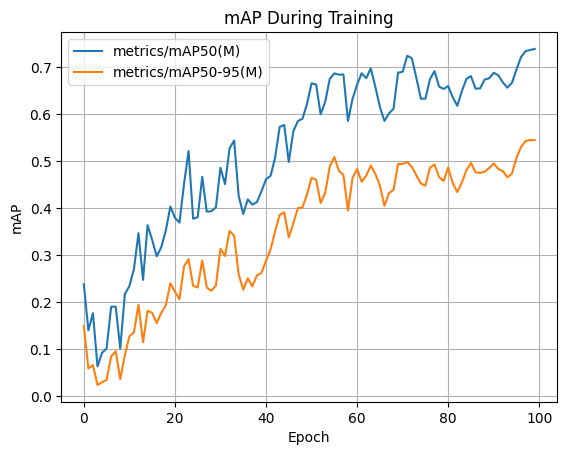

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/runs/segment/hazard_seg_augmented2/results.csv')
df[['metrics/mAP50(M)', 'metrics/mAP50-95(M)']].plot()
plt.title('mAP During Training')
plt.xlabel('Epoch')
plt.ylabel('mAP')
plt.grid(True)
plt.show()


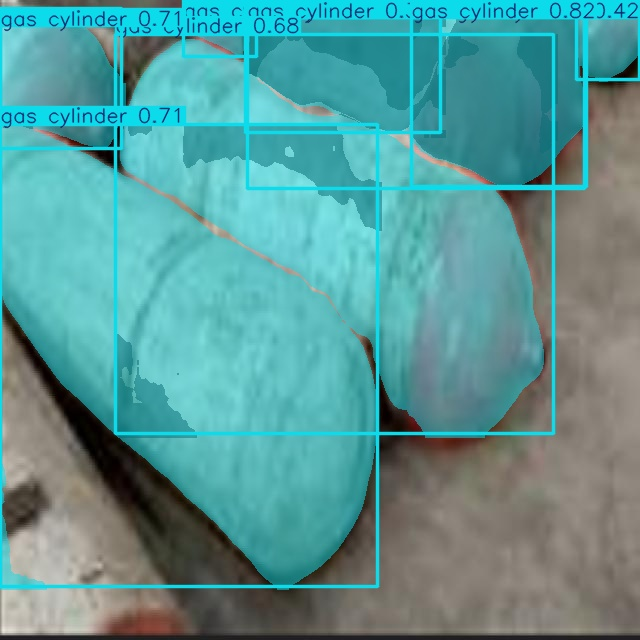

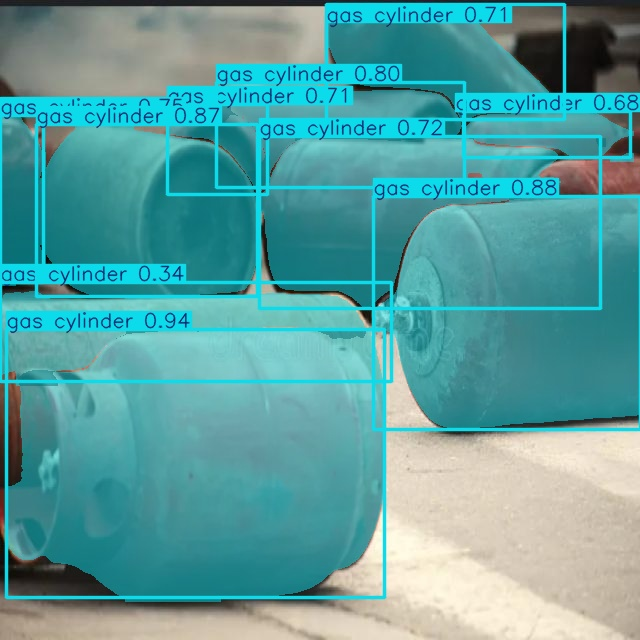

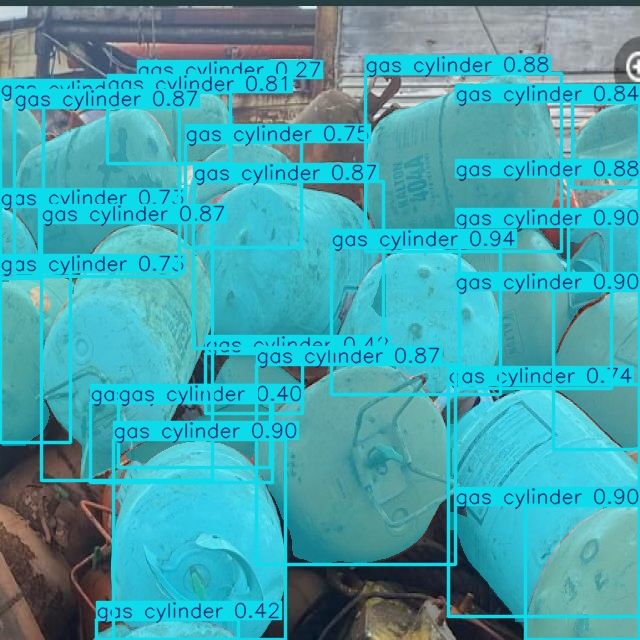

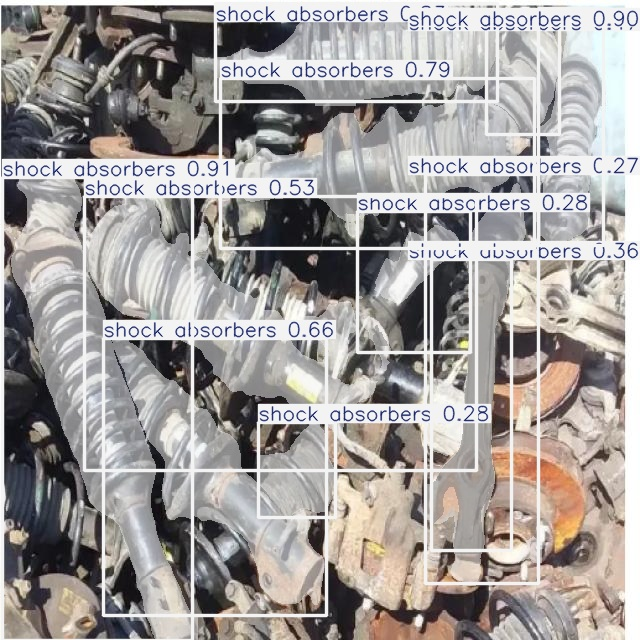

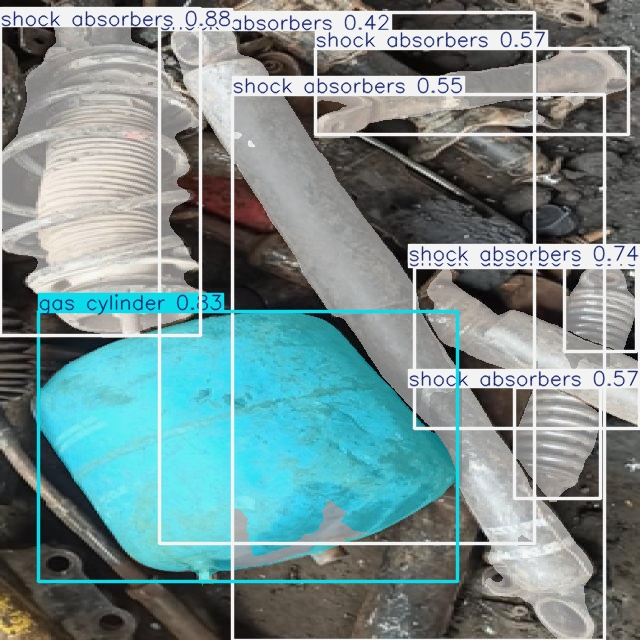

In [18]:
import os
from IPython.display import Image, display

# Path to predicted images
pred_dir = '/content/runs/segment/predict'

# Show all predictions (limit to 5 for preview)
pred_images = [os.path.join(pred_dir, img) for img in os.listdir(pred_dir) if img.endswith(('.jpg', '.png'))]

for img_path in pred_images[:5]:
    display(Image(filename=img_path))


In [19]:
!zip -r /content/predictions.zip /content/runs/segment/predict

  adding: content/runs/segment/predict/ (stored 0%)
  adding: content/runs/segment/predict/Screenshot-2025-02-16-223838_png.rf.f69eae95de8749d7ef0e73b0c18c8645.jpg (deflated 2%)
  adding: content/runs/segment/predict/Screenshot-2025-02-17-043115_png.rf.bf4104f1a2348d971265280fd127c3aa.jpg (deflated 2%)
  adding: content/runs/segment/predict/Screenshot-2025-02-17-042755_png.rf.23a0fb7020d9ebc368e77bbe5773fb4c.jpg (deflated 1%)
  adding: content/runs/segment/predict/Screenshot-2025-02-16-234711_png.rf.00dca64e7b9007a24ea54045a8b93630.jpg (deflated 2%)
  adding: content/runs/segment/predict/Screenshot-2025-02-16-232005_png.rf.e9f1b08050421a0dec5d2282591906d2.jpg (deflated 2%)
  adding: content/runs/segment/predict/Screenshot-2025-02-17-043322_png.rf.e98376d81b49779ae80f3e2be3b1c5e8.jpg (deflated 1%)
  adding: content/runs/segment/predict/Screenshot-2025-02-16-231006_png.rf.8457bb5aae61a3bb66724758800d55bd.jpg (deflated 2%)
  adding: content/runs/segment/predict/Screenshot-2025-02-16-22512

In [20]:
!cp /content/runs/segment/hazard_seg_augmented2/weights/best.pt /content/yolov8_model.pt
